Neste notebook faremos uma análise exploratória dos dados pré-processados da Wyscout, com foco em preparar os dados para a modelagem no notebook seguinte

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from mplsoccer import VerticalPitch

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#other
import aux_functions_plot as p

## Leitura dos dados e análise exploratória inicial


In [2]:
shots = pd.read_parquet('./data/shots_dataframe.parquet')

In [3]:
goals = shots[shots["goal"] == 1].copy()

In [4]:
shots.head()

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id,league,foot,firstName,lastName,label,venue,date,previous_event,x,y,c,distance,angle,goal,free_kick,counter_attack,rebound,prev_cross,prev_touch,prev_pass,prev_smart_pass,prev_duel
257339,10,Shot,"[{'id': 402}, {'id': 1401}, {'id': 1203}, {'id...",25437,"[{'x': 91, 'y': 29}, {'x': 0, 'y': 0}]",1694390,Shot,4418,1H,31.226217,100,88178649,European_Championship,left,Blaise,Matuidi,"France - Romania, 2 - 1",Stade de France,"June 10, 2016 at 9:00:00 PM GMT+2",Head pass,9.45,19.72,14.28,17.123694,0.242346,0,0,0,0,0,0,1,0,0
257923,10,Shot,"[{'id': 402}, {'id': 201}, {'id': 1216}, {'id'...",83824,"[{'x': 71, 'y': 29}, {'x': 100, 'y': 100}]",1694390,Shot,11944,1H,143.119551,100,88178722,European_Championship,right,Mihai Doru,Pintilii,"France - Romania, 2 - 1",Stade de France,"June 10, 2016 at 9:00:00 PM GMT+2",Simple pass,30.45,19.72,14.28,33.632141,0.196835,0,0,0,0,0,0,1,0,0
258172,10,Shot,"[{'id': 402}, {'id': 201}, {'id': 1201}, {'id'...",33235,"[{'x': 96, 'y': 57}, {'x': 100, 'y': 100}]",1694390,Shot,11944,1H,219.576026,100,88178751,European_Championship,right,Bogdan Sorin,Stancu,"France - Romania, 2 - 1",Stade de France,"June 10, 2016 at 9:00:00 PM GMT+2",Air duel,4.20,38.76,4.76,6.348039,0.851948,0,0,0,0,0,0,0,0,1
257684,10,Shot,"[{'id': 403}, {'id': 201}, {'id': 1215}, {'id'...",6165,"[{'x': 96, 'y': 61}, {'x': 100, 'y': 100}]",1694390,Shot,11944,1H,247.532561,100,88373458,European_Championship,right,Florin,Andone,"France - Romania, 2 - 1",Stade de France,"June 10, 2016 at 9:00:00 PM GMT+2",Air duel,4.20,41.48,7.48,8.578485,0.472204,0,0,0,0,0,0,0,0,1
257303,10,Shot,"[{'id': 401}, {'id': 2101}, {'id': 1802}]",3682,"[{'x': 75, 'y': 33}, {'x': 0, 'y': 0}]",1694390,Shot,4418,1H,557.319065,100,88178811,European_Championship,left,Antoine,Griezmann,"France - Romania, 2 - 1",Stade de France,"June 10, 2016 at 9:00:00 PM GMT+2",Simple pass,26.25,22.44,11.56,28.682679,0.233111,0,0,0,0,0,0,1,0,0


In [5]:
shots.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45284 entries, 257339 to 2988607
Data columns (total 34 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   eventId          45284 non-null  int64  
 1   subEventName     45284 non-null  object 
 2   tags             45284 non-null  object 
 3   playerId         45284 non-null  int64  
 4   positions        45284 non-null  object 
 5   matchId          45284 non-null  int64  
 6   eventName        45284 non-null  object 
 7   teamId           45284 non-null  int64  
 8   matchPeriod      45284 non-null  object 
 9   eventSec         45284 non-null  float64
 10  subEventId       45284 non-null  int64  
 11  id               45284 non-null  int64  
 12  league           45284 non-null  object 
 13  foot             45284 non-null  object 
 14  firstName        45284 non-null  object 
 15  lastName         45284 non-null  object 
 16  label            45284 non-null  object 
 17  venue

In [6]:
shots.isna().mean()

eventId            0.0
subEventName       0.0
tags               0.0
playerId           0.0
positions          0.0
matchId            0.0
eventName          0.0
teamId             0.0
matchPeriod        0.0
eventSec           0.0
subEventId         0.0
id                 0.0
league             0.0
foot               0.0
firstName          0.0
lastName           0.0
label              0.0
venue              0.0
date               0.0
previous_event     0.0
x                  0.0
y                  0.0
c                  0.0
distance           0.0
angle              0.0
goal               0.0
free_kick          0.0
counter_attack     0.0
rebound            0.0
prev_cross         0.0
prev_touch         0.0
prev_pass          0.0
prev_smart_pass    0.0
prev_duel          0.0
dtype: float64

In [8]:
shots.columns

Index(['eventId', 'subEventName', 'tags', 'playerId', 'positions', 'matchId',
       'eventName', 'teamId', 'matchPeriod', 'eventSec', 'subEventId', 'id',
       'league', 'foot', 'firstName', 'lastName', 'label', 'venue', 'date',
       'previous_event', 'x', 'y', 'c', 'distance', 'angle', 'goal',
       'free_kick', 'counter_attack', 'rebound', 'prev_cross', 'prev_touch',
       'prev_pass', 'prev_smart_pass', 'prev_duel'],
      dtype='object')

### Checando o tipo de dados das features

In [9]:
shots.select_dtypes("int").columns


Index(['eventId', 'playerId', 'matchId', 'teamId', 'subEventId', 'id', 'goal',
       'free_kick', 'counter_attack', 'rebound', 'prev_cross', 'prev_touch',
       'prev_pass', 'prev_smart_pass', 'prev_duel'],
      dtype='object')

In [10]:
shots.select_dtypes("float").columns

Index(['eventSec', 'x', 'y', 'c', 'distance', 'angle'], dtype='object')

In [11]:
shots.select_dtypes("object").columns

Index(['subEventName', 'tags', 'positions', 'eventName', 'matchPeriod',
       'league', 'foot', 'firstName', 'lastName', 'label', 'venue', 'date',
       'previous_event'],
      dtype='object')

Todas as colunas do dataframe estão com o data type correto. Além disso, verificamos que não temos ocorrência de NaNs em nenhuma das features

In [12]:
print(f"O dataset contém {shots.shape[1]} features (colunas) e {shots.shape[0]} linhas")

O dataset contém 34 features (colunas) e 45284 linhas


### Avaliando a distribuição de algumas features

Das variáveis do tipo 'int' iremos olhar apenas os gols (target). As demais variáveis são ou binárias ou de id.

### Avaliando o target (goals)

In [13]:
shots.groupby('goal').size().sort_values()

goal
1     4629
0    40655
dtype: int64

<AxesSubplot: xlabel='goal', ylabel='Count'>

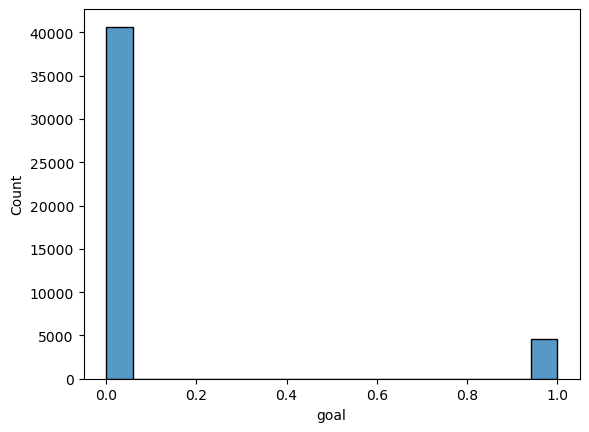

In [14]:
sns.histplot(shots['goal'])

### Avaliando as features do tipo object mais relevantes

In [15]:
shots.groupby('subEventName').size().sort_values()

subEventName
Free kick shot     2209
Shot              43075
dtype: int64

In [16]:
shots.groupby('eventName').size().sort_values()

eventName
Free Kick     2209
Shot         43075
dtype: int64

Estas 2 variáveis estão redundantes, e podemos excluir ambas, dado que já temos encoding para free_kick. Além disso, vamos excluir também position pois já extraimos as coordenadas x e y na etapa anterior.

In [19]:
excluir = ['eventName', 'subEventName', 'position', 'match_period']

In [32]:
shots.groupby('previous_event').size().sort_values(ascending = False)

previous_event
Simple pass                10615
Air duel                    5263
Ground attacking duel       4711
Ground defending duel       4553
Cross                       4057
Touch                       3003
Foul                        2099
Clearance                   2059
Smart pass                  1809
Ground loose ball duel      1446
Corner                       989
Head pass                    939
High pass                    915
Acceleration                 777
Reflexes                     526
Free kick cross              484
Shot                         216
Goalkeeper leaving line      162
Free Kick                    150
Save attempt                 131
Throw in                     126
Hand foul                     87
Launch                        60
Free kick shot                32
Protest                       23
Goal kick                     19
Out of game foul              12
Hand pass                      7
Late card foul                 6
Violent Foul                

### Avaliando as features do tipo float

<AxesSubplot: xlabel='x', ylabel='Count'>

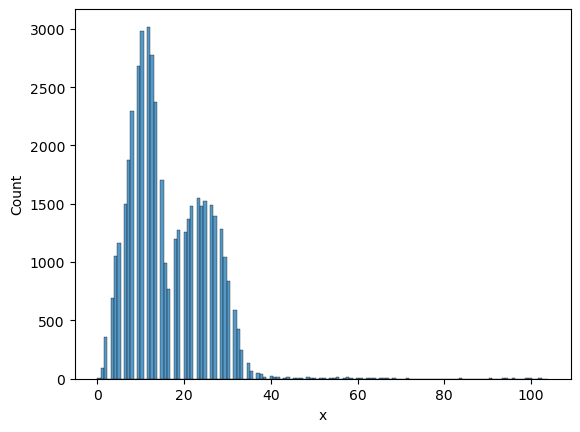

In [21]:
sns.histplot(shots['x'])

<AxesSubplot: xlabel='y', ylabel='Count'>

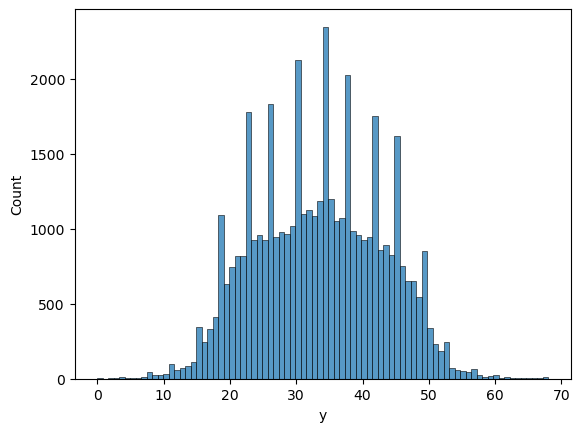

In [23]:
sns.histplot(shots['y'])

<AxesSubplot: xlabel='angle', ylabel='Count'>

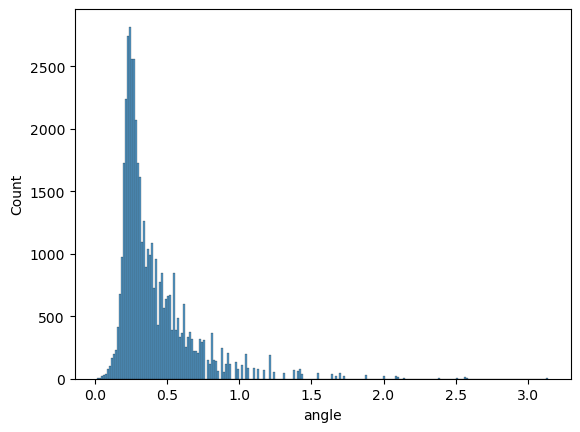

In [22]:
sns.histplot(shots['angle'])

<AxesSubplot: xlabel='distance', ylabel='Count'>

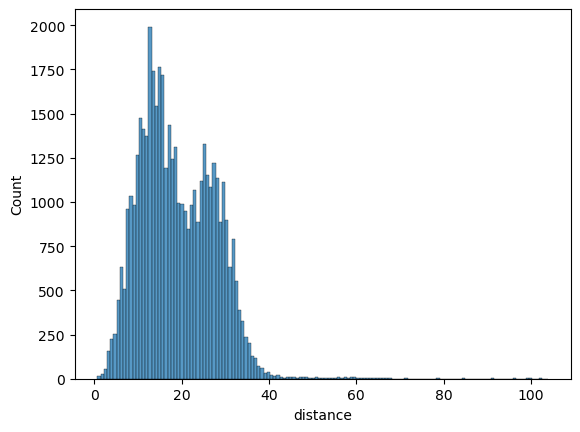

In [24]:
sns.histplot(shots['distance'])

### Avaliando a posição de onde os chutes partem e hipóteses iniciais

In [25]:
nb_shots, x,y, df_shots = p.prepare_heatmap(shots, 'x', 'y', 24,17, return_df = True)
share_shots = nb_shots / nb_shots.sum() * 100

/Users/lucasmaretti/Documents/repos/football_analytics_master/aux_functions_plot.py:500: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  df_img = df_pos.pivot(col_y + "ZoneMean", col_x + "ZoneMean", "aggVal")


In [26]:
share_shots = nb_shots / nb_shots.sum() * 100
# plot the heatmap
dict_info = {"Proporção de chutes (em %)": {"values": share_shots, "display_type": ".2f"},
             "Número de chutes": {"values": nb_shots, "display_type": ".0f"}}
fig = p.create_heatmap(x, y, share_shots, dict_info, title_name="Posição dos chutes")
fig.show()

Podemos observar que a maioria dos chutes parte de dentro da área adversária, o que faz sentido. Vamos plotar agora de onde saíram os chutes que de fato resultaram em gol

In [27]:

# numero de chutes por grid
nb_goals, x, y = p.prepare_heatmap(goals, "x", "y", 24, 17)

goal_proba = np.divide(nb_goals, nb_shots, out=np.zeros_like(nb_goals), where=nb_shots!=0) * 100


# plotando o heatmap
dict_info = {"Probabilidade de marcar (em %)": {"values": goal_proba, "display_type": ".1f"},
             "Fração de chutes (em %)": {"values": share_shots, "display_type": ".2f"},
             "Numero de chutes": {"values": nb_shots, "display_type": ".0f"},
             "Numero de goals": {"values": nb_goals, "display_type": ".0f"}}
fig = p.create_heatmap(x, y, goal_proba, dict_info, title_name="Probabilidade de marcar")
fig.show()

/Users/lucasmaretti/Documents/repos/football_analytics_master/aux_functions_plot.py:500: FutureWarning:

In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.



É possível notar que a probabilidade marcar é maior quando se está na área adversária. Curioso notar que parece existir alguns outliers no dataset, que são gols que são marcados de muito longe, incluindo um caso que o chute partiu da área adversária e outro da lateral do campo na altura do círculo central. Vamos olhar mais de perto dentro da área no próximo plot

/var/folders/d2/5n02rp0x0x72ht561l_7rrmh0000gn/T/ipykernel_27125/1474929513.py:8: RuntimeWarning:

invalid value encountered in divide



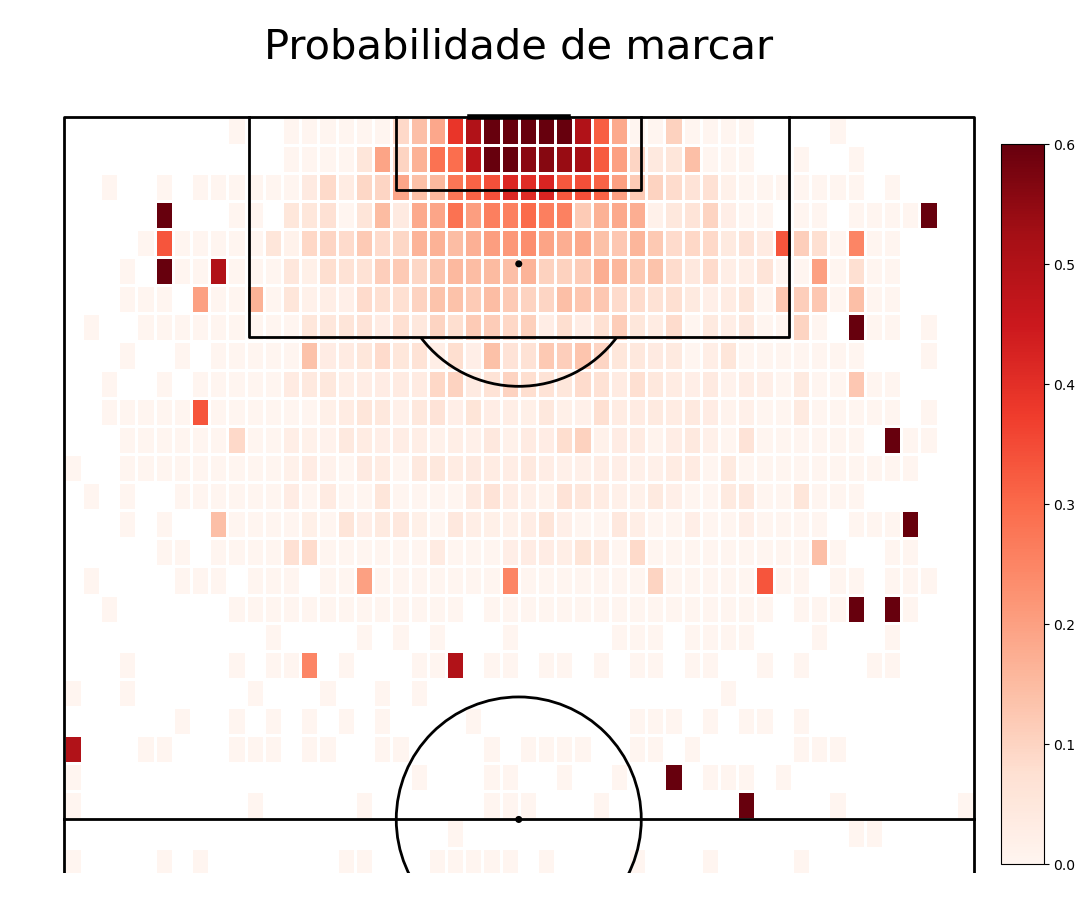

In [28]:
#plot pitch
pitch = VerticalPitch(line_color='black', half = True, pitch_type='custom', pitch_length=105, pitch_width=68, line_zorder = 2)
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
bin_statistic = pitch.bin_statistic(105 - shots['x'], shots['y'], bins = 50)
#normalize number of goals by number of shots
bin_statistic_goals = pitch.bin_statistic(105 - goals['x'], goals['y'], bins=50)
bin_statistic["statistic"] = bin_statistic_goals["statistic"]/bin_statistic["statistic"]
#plot heatmap
pcm = pitch.heatmap(bin_statistic, ax=ax["pitch"], cmap='Reds', edgecolor='white', vmin = 0, vmax = 0.6)
#make legend
ax_cbar = fig.add_axes((0.95, 0.05, 0.04, 0.8))
cbar = plt.colorbar(pcm, cax=ax_cbar)
fig.suptitle('Probabilidade de marcar' , fontsize = 30)
plt.show()

In [29]:
outliers = shots[(shots['x'] > 40) & shots['goal'] == 1]
outliers

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id,league,foot,firstName,lastName,label,venue,date,previous_event,x,y,c,distance,angle,goal,free_kick,counter_attack,rebound,prev_cross,prev_touch,prev_pass,prev_smart_pass,prev_duel
602589,10,Shot,"[{'id': 101}, {'id': 402}, {'id': 201}, {'id':...",7944,"[{'x': 44, 'y': 40}, {'x': 0, 'y': 0}]",2499856,Shot,1623,2H,1254.782389,100,210484394,England,right,Wayne,Rooney,"Everton - West Ham United, 4 - 0",Goodison Park,"November 29, 2017 at 9:00:00 PM GMT+1",Simple pass,58.80,27.20,6.80,59.191891,0.122699,1,0,0,0,0,0,1,0,0
2479068,10,Shot,"[{'id': 101}, {'id': 402}, {'id': 201}, {'id':...",28115,"[{'x': 53, 'y': 32}, {'x': 0, 'y': 0}]",2500707,Shot,3766,1H,559.297626,100,180038263,France,left,Nabil,Fekir,"Olympique Lyonnais - Bordeaux, 3 - 3",Groupama Stadium,"August 19, 2017 at 5:00:00 PM GMT+2",Touch,49.35,21.76,12.24,50.845256,0.139547,1,0,0,0,0,1,0,0,0
2486704,10,Shot,"[{'id': 101}, {'id': 401}, {'id': 201}, {'id':...",25715,"[{'x': 51, 'y': 25}, {'x': 100, 'y': 100}]",2500888,Shot,3783,2H,2893.810499,100,221554614,France,right,Ronny,Rodelin,"Bordeaux - Caen, 0 - 2",Stade Matmut-Atlantique,"January 16, 2018 at 7:00:00 PM GMT+1",Simple pass,51.45,17.00,17.00,54.185815,0.128152,1,0,0,0,0,0,1,0,0
1133431,10,Shot,"[{'id': 101}, {'id': 402}, {'id': 1401}, {'id'...",14734,"[{'x': 60, 'y': 72}, {'x': 100, 'y': 100}]",2516911,Shot,2453,2H,1334.772942,100,223975587,Germany,right,Nils,Petersen,"Borussia Dortmund - Freiburg, 2 - 2",Signal-Iduna-Park,"January 27, 2018 at 3:30:00 PM GMT+1",Simple pass,42.00,48.96,14.96,44.584769,0.154472,1,0,0,0,0,0,1,0,0
1756980,10,Shot,"[{'id': 101}, {'id': 402}, {'id': 201}, {'id':...",224680,"[{'x': 55, 'y': 100}, {'x': 0, 'y': 0}]",2516933,Shot,2462,2H,1263.092525,100,227230696,Germany,right,Marius,Wolf,"Eintracht Frankfurt - K\u00f6ln, 4 - 2",Commerzbank-Arena,"February 10, 2018 at 3:30:00 PM GMT+1",Simple pass,47.25,68.00,34.00,58.211361,0.102118,1,0,0,0,0,0,1,0,0
2249707,10,Shot,"[{'id': 101}, {'id': 403}, {'id': 201}, {'id':...",15069,"[{'x': 8, 'y': 49}, {'x': 100, 'y': 100}]",2516989,Shot,2975,2H,482.920385,100,238892068,Germany,right,Willi,Orban,"Hannover 96 - RB Leipzig, 2 - 3",HDI-Arena,"March 31, 2018 at 3:30:00 PM GMT+2",Cross,96.60,33.32,0.68,96.602393,0.075736,1,0,0,0,1,0,0,0,0
2249732,10,Shot,"[{'id': 101}, {'id': 1901}, {'id': 402}, {'id'...",56274,"[{'x': 3, 'y': 49}, {'x': 100, 'y': 100}]",2516989,Shot,2975,2H,1858.745879,100,238892453,Germany,right,Yussuf,Yurary Poulsen,"Hannover 96 - RB Leipzig, 2 - 3",HDI-Arena,"March 31, 2018 at 3:30:00 PM GMT+2",Cross,101.85,33.32,0.68,101.852270,0.071836,1,0,1,0,1,0,0,0,0
2940608,10,Shot,"[{'id': 101}, {'id': 401}, {'id': 201}, {'id':...",4015,"[{'x': 1, 'y': 51}, {'x': 0, 'y': 0}]",2565775,Shot,680,2H,37.063761,100,227470407,Spain,left,Pablo,Sarabia Garc\u00eda,"Sevilla - Girona, 1 - 0",Estadio Ram\u00f3n S\u00e1nchez Pizju\u00e1n,"February 11, 2018 at 12:00:00 PM GMT+1",Reflexes,103.95,34.68,0.68,103.952224,0.070386,1,0,0,0,0,0,0,0,0


Usando os dados das informações da partida como label, venue e date foi possível encontrar alguns destes gols no youtube. E a conclusão foi que parece ter havido erro no registro de dados para estes gols, dados que vários deles ocorreram dentro da área adversária como o de Yussuf Poulsen pelo RB Leipzig e de Pablo Sarabia pelo Girona.

In [30]:
nb_shots, x,y, df_shots = p.prepare_heatmap(outliers, 'x', 'y', 24,17, return_df = True)
share_shots = nb_shots / nb_shots.sum() * 100

# plot the heatmap
dict_info = {"Proporção de chutes (em %)": {"values": share_shots, "display_type": ".2f"},
             "Número de chutes": {"values": nb_shots, "display_type": ".0f"}}
fig = p.create_heatmap(x, y, share_shots, dict_info, title_name="Posição dos chutes outliers")
fig.show()

/Users/lucasmaretti/Documents/repos/football_analytics_master/aux_functions_plot.py:500: FutureWarning:

In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.



In [31]:
outliers.shape[0]/goals.shape[0] * 100

0.17282350399654353

Os gols outliers representam uma fração irrisória do total de gols. Mesmo assim iremos filtrá-los usando o fato de que para considerarmos um gol como válido de uma determinada posição, precisa-se ser necessário ter pelo menos 10 chutes desta posição.

In [33]:
### fazer o código para filtrar aqui

#### Hipótese 1) 

#### Existe alguma relação entre o ângulo do chute e gols?

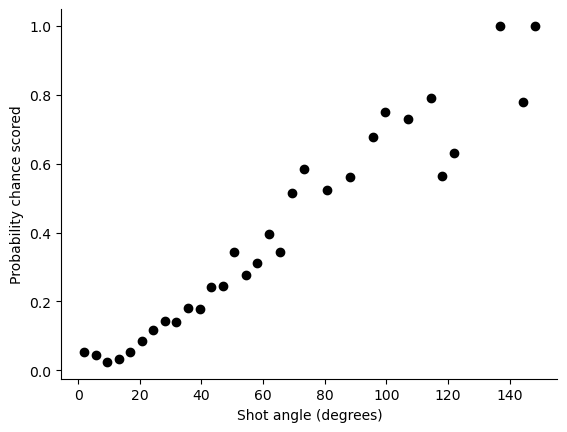

In [35]:
#number of shots from angle
shotcount_dist = np.histogram(shots['angle']*180/np.pi, bins=40, range=[0, 150])
#number of goals from angle
goalcount_dist = np.histogram(goals['angle']*180/np.pi, bins=40, range=[0, 150])
np.seterr(divide='ignore', invalid='ignore')
#probability of scoring goal
prob_goal = np.divide(goalcount_dist[0], shotcount_dist[0])
angle = shotcount_dist[1]
midangle = (angle[:-1] + angle[1:])/2
#make plot
fig,ax = plt.subplots()
ax.plot(midangle, prob_goal, linestyle='none', marker= '.', markersize= 12, color='black')
ax.set_ylabel('Probability chance scored')
ax.set_xlabel("Shot angle (degrees)")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

#### Hipótese 2) 

#### Existe alguma relação entre a distância do chute e gols?